In [38]:
import numpy as np
import pandas as pd

df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [39]:
len(df)

5572

## Check for missing values:
Machine learning models usually require complete data.

In [41]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

## Take a quick look at the *ham* and *spam* `label` column:

In [42]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [43]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## We will use NLTK to make it better

In [44]:
import nltk
#nltk.download()

### 1. Remove Punctuation

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
# function to remove punctuation
def remove_punct(text):
    removed_punct = "".join([char for char in text if char not in string.punctuation])
    return removed_punct


df['data_without_punct'] = df['message'].apply(lambda x: remove_punct(x))

df.head()

,label,message,length,punct,data_without_punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,29,6,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,6,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,Nah I dont think he goes to usf he lives aroun...


#### We can see that punctuations have been removed and data is now a bit clean

### 2. Tokenization

Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text.

In [48]:
import re

#Function to tokenize words
def tokenize(text):
    tokens= re.split('\W+',text)   # any word(A-Za-z0-9)
    return tokens

df['tokenized_data'] = df['data_without_punct'].apply(lambda x : tokenize(x.lower()))

df.head()

,label,message,length,punct,data_without_punct,tokenized_data
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,6,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,6,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


We can see that all words have been generated as tokens

### 3. Remove Stop words
Stopwords are common words that will likely appear in any text. They don’t tell us much about our data so we remove them.
ex.-a,the,an

In [49]:
stopword = nltk.corpus.stopwords.words('english')


In [50]:
#function to remove stopwords
def remove_stopwords(tokenized_text):
    text = [word for word in tokenized_text if word not in stopword]
    return text

df['data_without_stopw'] = df['tokenized_data'] .apply(lambda x: remove_stopwords(x))

df.head()

,label,message,length,punct,data_without_punct,tokenized_data,data_without_stopw
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,6,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,6,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


We can see all stop words have been removed from the data

### 4. Lemmatization/Stemming
We wont be performing Stemming as Lemmatization gives better results

*Stemming is typically faster as it simply chops off the end of the word, without understanding the context of the word. Lemmatizing is slower and more accurate as it takes an informed analysis with the context of the word in mind*

In [52]:
wn = nltk.WordNetLemmatizer()

def lemmer(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['lemmatized_text'] = df['data_without_stopw'].apply(lambda x: lemmer(x))

df.head(10)
    


,label,message,length,punct,data_without_punct,tokenized_data,data_without_stopw,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,6,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,6,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8,FreeMsg Hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darling, 3, week, word, back, i..."
6,ham,Even my brother is not like to speak with me. ...,77,2,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, melle, melle, oru, minnaminungi..."
8,spam,WINNER!! As a valued network customer you have...,157,6,WINNER As a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valued, network, customer, selected, ..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,2,Had your mobile 11 months or more U R entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobile, 11, month, u, r, entitled, update, la..."


### 5. Vectorize data
Vectorizing is the process of encoding text as integers i.e. numeric form to create feature vectors so that machine learning algorithms can understand our data.

We will use Tf-IDF process-
It computes “relative frequency” that a word appears in a document compared to its frequency across all documents. It is more useful than “term frequency” for identifying “important” words in each document (high frequency in that document, low frequency in other documents).

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


We have cleaned the data, and we can create a single function for this and perform all our opration on 'message' column

In [61]:
data = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')


In [69]:
ps = nltk.PorterStemmer()
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

## Splitting the data into train and test data

In [70]:
from sklearn.model_selection import train_test_split

X=data[['message', 'length', 'punct']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Vectorize the text

In [71]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['message'])

tfidf_train = tfidf_vect_fit.transform(X_train['message'])
tfidf_test = tfidf_vect_fit.transform(X_test['message'])

X_train_vect = pd.concat([X_train[['length', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['length', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,length,punct,0,1,2,3,4,5,6,7,...,7144,7145,7146,7147,7148,7149,7150,7151,7152,7153
0,103,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,104,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,154,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


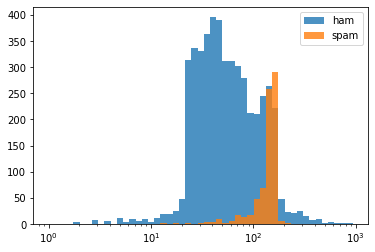

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>It looks like there's a small range of values where a message is more likely to be spam than ham.</font>

Now let's look at the `punct` column:

In [8]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

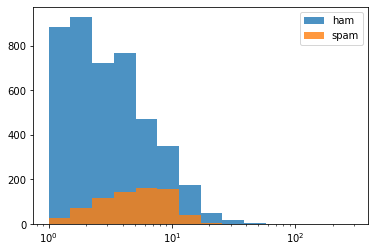

In [9]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>This looks even worse - there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results.</font>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


Now we can pass these sets into a series of different training & testing algorithms and compare their results.

## Model building

In [72]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

Precision: 1.0 / Recall: 0.846 / F1-Score: 0.916 / Accuracy: 0.979


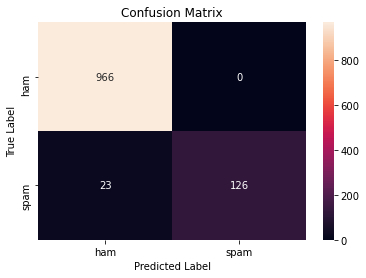

In [73]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()